# Machine Learning em Python - Parte 1 - Classificação

In [1]:
from IPython.display import Image
Image(url = 'images/processo.png')

In [2]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.20.3'

## Definição do Problema de Negócio

Vamos criar um modelo preditivo que seja capaz de prever se uma pessoa pode ou não desenvolver diabetes. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo. Se a DEFINIÇÃO não for bem feita, nosso trabalho estará COMPROMETIDO.

A partir desta definição  começamos nosso trabalho de coleta do dataset, transformação das variáveis, divisão de dados de Treino e Teste...

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes. Contém dados multivariados, podendo ser usado para séries temporais. 

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)  

Precisamos das variáveis preditoras e da variável target.

## Extraindo e Carregando os Dados

Existem diversas considerações ao se carregar dados para o processo de Machine Learning. Por exemplo: seus dados possuem um header (cabeçalho)? Caso negativo, você vai precisar definir o título para cada coluna. Seus arquivos possuem comentários? Qual o delimitador das colunas? Alguns dados estão entre aspas, simples ou duplas?

In [3]:
# Carregando arquivo csv usando NumPy - Primeira Forma
# Biblioteca NumPy fornece estrutura de dados para Armazenamento de dados
import numpy as np
arquivo = 'data/pima-data.csv' # Arquivo
arquivo_data = open(arquivo, 'rb') # Abrir arquivo com as devidas permissões
dados = np.loadtxt(arquivo_data, delimiter = ",") # Função Numpy loadtxt(), verificar delimitador
print(dados.shape) #Observar número de instâncias e atributos

(768, 9)


In [4]:
# Carregando arquivo csv usando Pandas- Segunda Forma
# Biblioteca Pandas fornece estrutura de dados para Armazenamento de dados
import pandas as pd
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#Já sei que o arquivo não possui cabeçalho e preencho na importação 
dados = pd.read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


In [5]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
from pandas import read_csv #Importa apenas esta função do Pandas
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


## Análise Exploratória de Dados
### Pré-Processamento de Dados

### Estatística Descritiva

In [6]:
# Visualizando as primeiras 20 linhas
dados.head(20)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


• Se o número de linhas no arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. 

• Se o número de registros for muito pequeno, podemos não ter registros suficientes para treinar o modelo.

• Se tivermos muitas colunas no arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade. Podemos aplicar redução de dimensionalidade se necessário. 

• A melhor solução vai depender de cada caso. 

• ATENÇÃO: treiar o modelo em um subset do conjunto de dados maior e depois aplique o modelo a novos dados.


In [7]:
# Visualizando as dimensões
dados.shape

(768, 9)

O tipo dos dados é muito importante. Pode ser necessário converter strings, ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

In [8]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


! Em problemas de classificação pode ser necessário balancear as classes. 

! Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. 

! Podemos ver abaixo que existe uma clara desproporção entre as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes).

In [10]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

• A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. 

• Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

• Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

? Como saber se o algoritmo requer modificação? Consultar documentação do algoritmo para saber o que o algoritmo necessita. 

Esclarecimento com Matemática para Machine Learning. 

In [11]:
# Correlação de Pearson entre todas as variáveis do dataset
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


O que é relevante no retorno da correlação é observar o valor das variáveis preditoras em relação ao target. 

Age x Target: correlação positiva, à medida que se envelhece, maior a probabilidade de desenvolver Diabetes. 

• Skew (ou simetria) se refere à distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). 

• Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. 

• Conhecendo a simetria dos dados, permite que você faça uma preparação ou ajuste de escala e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [12]:
# Verificando o skew de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

# Trazer para a Análise Exploratória a Visualização com Matplotlib

In [ ]:
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline # Para podermos gerar gráficos dentro desta janela

! Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. 

! Criar um histograma por variável (univariado).

Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Cada bin representa uma coluna. 

Com o histograma, podemos rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

! Podemos ver que os atributos age, pedi e test possuem uma distribuição EXPONENCIAL.  

! Podemos ver que as colunas mass e press possuem uma distribuição NORMAL.

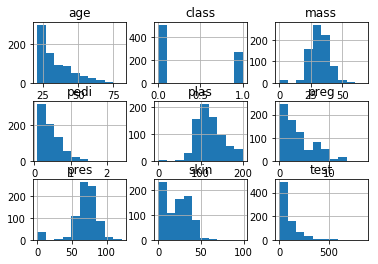

In [14]:
# Histograma Univariado
dados.hist()
plt.show()

# Os gráficos aparecem pequenos por conta do %matplotlib inline
# Para visualizar de maneira mais ampla:
  #Kernel > Restart e Clear Output
    #Remover linha de inline e gráfico aparecerá em outra janela

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. 

O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma.

! Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

! A classe parece ter dois picos por justamente existir duas classes.

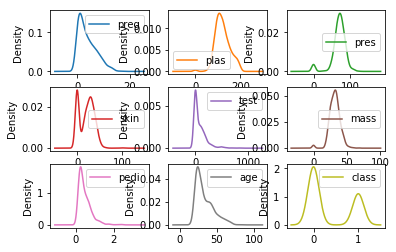

In [15]:
# Density Plot Univariado 'Density'
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()



! Com os boxplots também podemos REVISAR a distribuição dos dados para cada atributo.

A linha no centro (vermelho) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%.

Podemos ver que a dispersão dos dados é bem diferente entre os atributos. As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

! Boxplot permite rapidamente identificar outliers. Valores que fogem muito da média dos dados. 

! Boxplot ajuda a ter uma ideia da dispersão dos dados. 

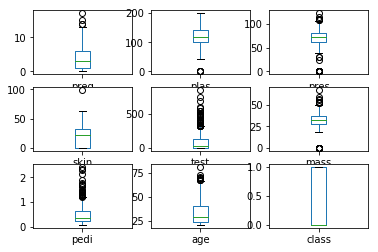

In [16]:
# Box and Whisker Plots
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

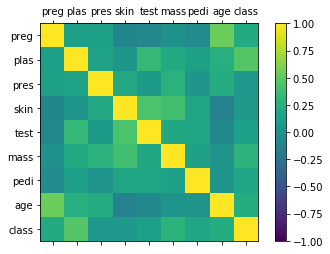

In [17]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()
# A variável correlations recebe todas as correlações de dados

# Plot
import numpy as np # Chamar Numpy
fig = plt.figure() # Plotar figura
ax = fig.add_subplot(111) # Adicionar subplot
cax = ax.matshow(correlations, vmin = -1, vmax = 1) # Mostrar correlações no intervalo de -1 a +1
fig.colorbar(cax) # Colorir boxplot
ticks = np.arange(0, 9, 1) # O array define o tamanho do quadrado 9x9 a plotar
ax.set_xticks(ticks) # Pega o tamanho de "ticks" e coloca no eixo x
ax.set_yticks(ticks) # Pega o tamanho de "ticks" e coloca no eixo 
ax.set_xticklabels(colunas) # Aplica as colunas listadas no início  como labels 
ax.set_yticklabels(colunas) # Aplica as colunas listadas no início como labels
plt.show() # Plotar

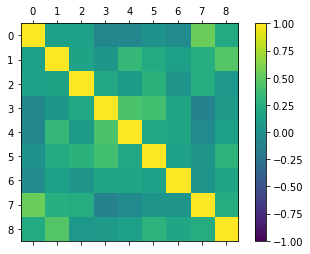

In [18]:
# Matriz de Correlação genérica simplificada
# É o mesmo procedimento de anteriormente sem estabelecer labels
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

! Um scatterplot mostra o relacionamento entre duas variáveis como pontos em duas dimensões, sendo um eixo para cada variável.
 
! Podemos criar um scatterplot para cada par de variáveis em nosso dataset. A exemplo da matriz de correlação, o scatterplot matrix é simétrico.

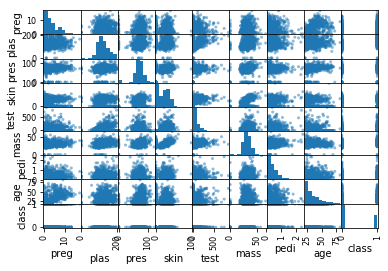

In [19]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

## Visualização com Seaborn 
### Amplamente usado para Análise Exploratória

In [20]:
import seaborn as sns

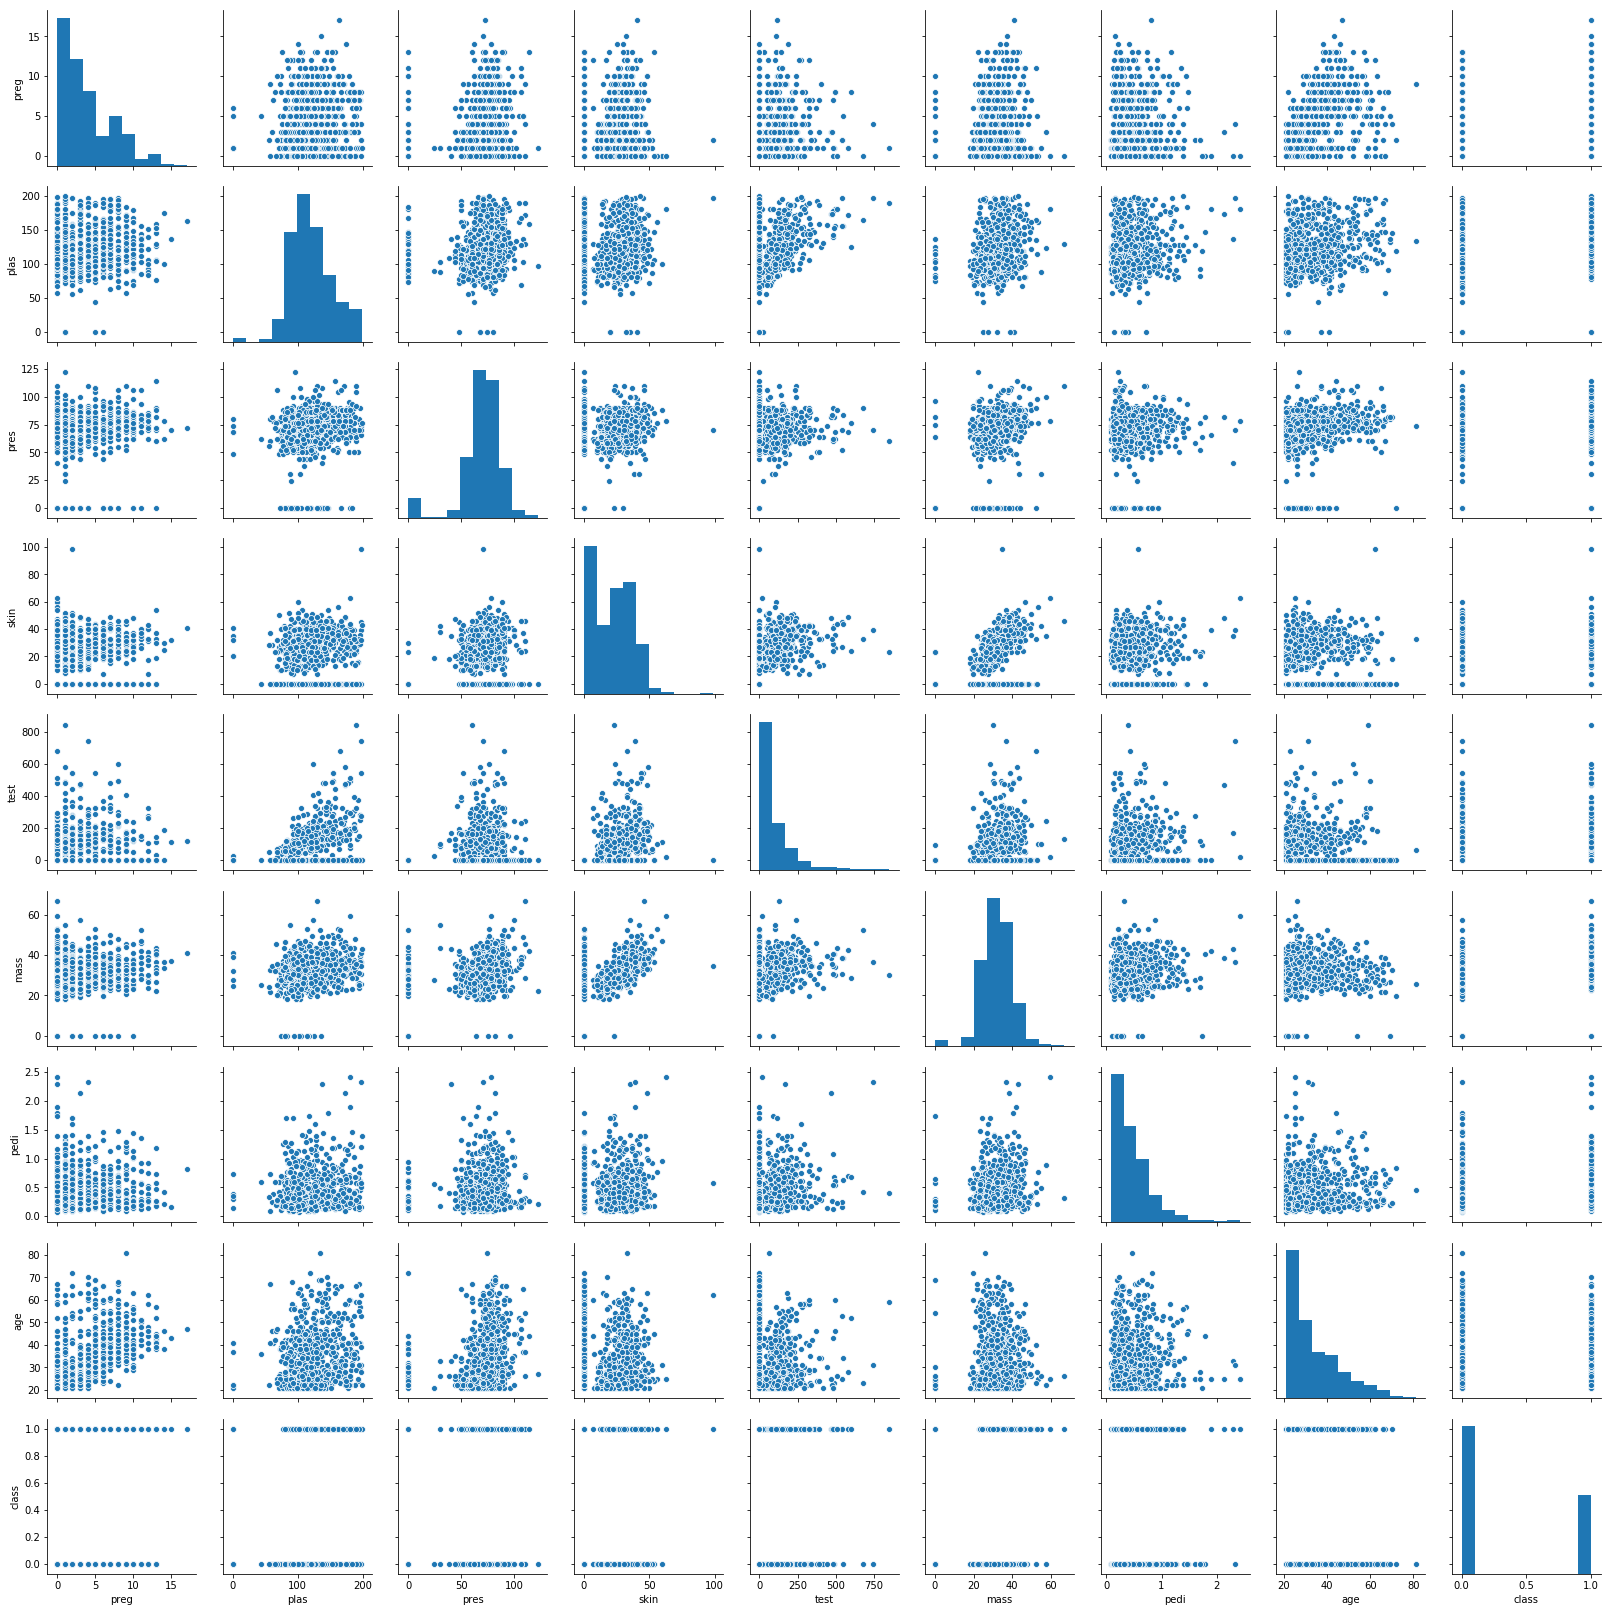

In [21]:
# Pairplot
sns.pairplot(dados)

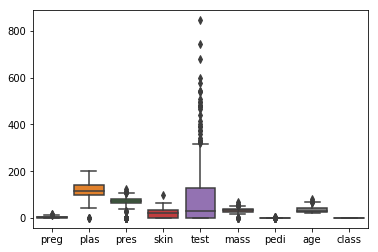

In [22]:
# Boxplot com orientação vertical, variáveis lado a lado
# Parâmetros bem mais simples
sns.boxplot(data = dados, orient = "v")

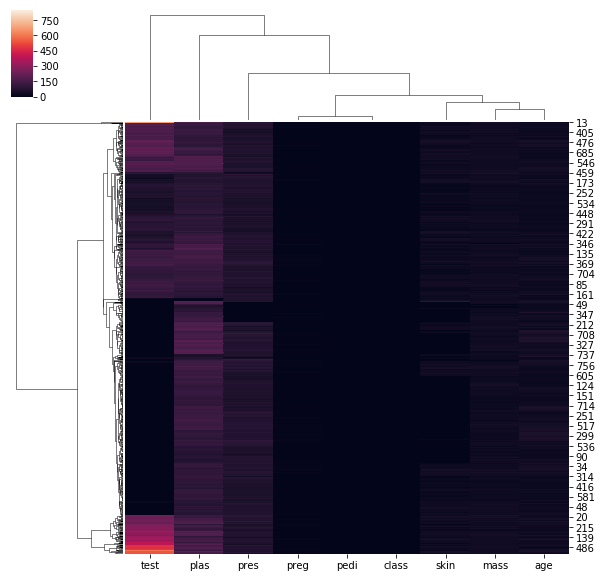

In [23]:
# Clustermap para ver como os dados estão organizados dentro do conjunto
sns.clustermap(dados)

In [24]:
dados.describe # Describe co Seaborn

<bound method NDFrame.describe of      preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0 

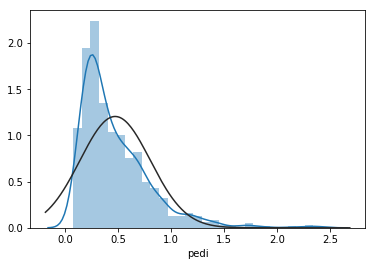

In [25]:
from scipy import stats
sns.distplot(dados.pedi, fit = stats.norm);
# Chamando apenas a coluna pedi, chmando parâmetro fit 
# Stats.norm vem do pacote scipy para aplicar resumos estatísticos

## Preparando os Dados para Machine Learning

Muitos algoritmos esperam receber os dados em um formato específico. É nosso trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que estejamos utilizando.

É muito provável que tenhamos que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

## Normalização - Método 1 (Mesma Escala dos Dados)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

! Altera a ESCALA dos dados.

É uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [26]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler # Importando função MinMaxScaler

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values # Pegar os dados e colocar num array

# Separando o array em componentes de input (X) e output (Y)
#MUITO IMPORTANTE FAZER ESSE FATIAMENTO
X = array[:,0:8]# O dataset possui 9 colunas, sendo que as 8 primeiras são preditoras.
Y = array[:,8] # Á última coluna é a classe target

# Gerando a nova escala (normalizando os dados)
# Aplicando a função MinMaxScaler() para fazer a NORMALIZAÇÃO
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X) #fit para variáveis preditoras
#MUITO IMPORTANTE 
#Fazer o fit após o MinMax para aplicar ao conjunto de dados X

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])



Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


# Os dados Normalizados ainda representam a mesma Informação, MAS numa escala diferente. 

## Normalização - Método 2 (Mesma Escala dos Dados)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

No scikit-learn, normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). 

Este método de pré-processamento é útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada. 

Útil quando usamos algoritmos de redes neurais ou que usam medida de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada Normalizer().

In [27]:
# Normalizando os dados deixando-os com o comprimento igual a 1
# VETOR DE COMPRIMENTO 1
from pandas import read_csv
from sklearn.preprocessing import Normalizer

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Padronização (Distribuição Normal)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

! MANTÉM A DISTRIBUIÇÃO ORIGINAL DOS DADOS. Coloca a distribuição em FORMATO NORMAL ou Gaussiano de média 0 e desvio-padrão igual a 1

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [2]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler 
# Função de Escala Padrão, do pacote Preprocessing do Pacote Sklearn

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X) #Aplicando a função de Padronização 
standardX = scaler.transform(X)  #Aplicando às variáveis preditoras

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

# Dados PADRONIZADOS, ainda representam a mesma informação 
# Dados com DISTRIBUIÇÃO NORMAL #StandardScaler()

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Padronizados: 

 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


## Binarização (Transformar os Dados em Valores Binários)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

! Colocar dados com valor 0 ou 1. Valores Binários.

Nós podemos definir um valor LIMITE em nossos dados, ao qual chamamos de threshold e então definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como sendo 0. Isso é o que chamamos de Binarização. 

Isso é útil quando temos probabilidades e queremos transformar os dados em algo com mais significado. O scikit-learn possui uma função para esta etapa, chamada Binarizer().

In [29]:
# Binarização

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando a binarização
binarizer = Binarizer(threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Binarizados: \n\n", binaryX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Binarizados: 

 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Feature Selection de Variáveis com Scikit-learn

Os atributos presentes no seu dataset e que você utiliza nos dados de TREINO, terão grande influência na precisão e resultado do seu modelo preditivo.

Atributos irrelevantes terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. 

! O Scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis.

A etapa de FEATURE SELECTION é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. 

! O Feature Selection nos ajuda a REDUZIR OVERFITTING (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

! A ideia é criar um MODELO GENERALIZAVEL que não receba apenas os Dados de Treino, mas que receba todo e qualquer conjunto de dados. 

## Seleção Univariada

Documentação MUITO DIDÁTICa Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

função SelectKbest() para selecionar as melhores variáveis dentro do conjunto de dados.

Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável de saída (Y, classe, rótulo, target, alvo) que estamos tentando prever.


O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos ideais (variáveis preditoras). Vamos usar o teste qui-quadrado e selecionar os 4 melhores atributos que podem ser usados como variáveis preditoras.

Na documentação do Scikit-learn, existe a lista com todos os testes estatísticos oferecidos pela função SelectKBest()

In [30]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado neste exemplo)

# Import dos módulos - CADA CÉLULA DO JUPYTER É INDEPENDENTE
from pandas import read_csv # Importando arquivo csv com Pandas novamente

from sklearn.feature_selection import SelectKBest # Pacote feature_selection
from sklearn.feature_selection import chi2 # Selecionar qual das funções estatatísticas utilizar

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8] # Preditoras
Y = array[:,8] # Target

# Função para seleção de variáveis com KBest
# Como score_func, optamos chi2 como função estatística para retornar 4"k" atributos mais relevantes do conjunto
best_var = SelectKBest(score_func = chi2, k = 4)
# Objeto best_var conterá as "4k" melhores variáveis preditoras 

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)
# Verifica com .fit() quais das variáveis serão mais relevantes para X e Y
# Queremos as melhores Variáveis Preditoras para prever o Target

# Depois da avaliação da função .fit(), extraimos apenas as mais relevantes
# Reduz X para os recursos selecionados de 4k
features = fit.transform(X)

# Imprimindo resultados 
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)


Número original de features: 8

Número reduzido de features: 4

Features (Variáveis Selecionadas): 

 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


## Eliminação Recursiva de Atributos com Machine Learning

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Machine Learning para encontrar as melhores variáveis preditoras para depois construir um modelo de Machine Learning. Extrair de forma automatizada as melhores variáveis do conjunto.

Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnica é chamada Recursive Feature Elimination (RFE).

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar as 3 melhores variáveis preditoras. O RFE selecionou as variáveis "preg", "mass" e "pedi", que estão marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

In [31]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE # Pacote feature_selection
from sklearn.linear_model import LogisticRegression # Importação de Algoritmo de Regres~sao do Pacote linear_model

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do modelo de Machine Learning a partir do pacote pronto
modelo = LogisticRegression()

# RFE ELIMINAÇÃO RECURSIVA, extrair as 3 variáveis que mais contribuem na acurácia
rfe = RFE(modelo, 3) # Depois de criado o modelo, aplicar a função RFE
# Uma vez criado o rfe, realizar o fit(x,y)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", dados.columns[0:8])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Variáveis Selecionadas: [ True False False False False  True  True False]
Ranking dos Atributos: [1 2 3 5 6 1 1 4]
Número de Melhores Atributos: 3


## Método Ensemble para Seleção de Variáveis

Conjunto de Algoritmos trabalhando juntos para aumentar a PRECISÃO.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método RETORNA UM SCORE para cada atributo.

Quanto maior o score, maior a importância do atributo.

In [32]:
# Importância do Atributo com o Extra Trees Classifier para CLASSIFICAÇÃO
# Conjunto de árvores de decisão dentro de um pacote - Ensemble

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier # Pacote Ensemble 

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo Preditivo - Feature Selection
modelo = ExtraTreesClassifier() # Quando parâmetros não são apresentados o próprio algoritmo seleciona
modelo.fit(X, Y) # Processo de Treinamento apresentando entrada e saída

# Print dos Resultados
print(dados.columns[0:8])
print(modelo.feature_importances_) #Retorna Score por Atributo

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.10930352 0.2127304  0.09629945 0.08169956 0.07238011 0.15813079
 0.11625988 0.15319628]


# CADA UM DOS MÉTODOS PODE GERAR VARIÁVEIS DIFERENTES!

# SELECIONAR O MELHOR MÉTODO DE ACORDO COM PROBLEMA DE NÉGÓCIO E CONJUNTO DE DADOS.

# 3a Etapa de Pré-Processamento 
## Redução de Dimensionalidade (Feature Extraction)

## Principal Component Analysis (PCA)

O PCA foi inventado em 1901 por Pearson e utiliza álgebra linear para transformar datasets em uma forma comprimida, o que é geralmente conhecido como Redução de Dimensionalidade. Com PCA você pode escolher o número de dimensões (chamados COMPONENTES PRINCIPAIS) no resultado transformado. 

! Vamos usar PCA para SELECIONAR 3 COMPONENTES PRINCIPAIS. 

A Análise de Componentes Principais (PCA) é um MÉTODO PARA EXTRAÇÃO DE VARIÁVEIS IMPORTANTES(na forma de componentes) a partir de um grande conjunto de variáveis, disponíveis em um conjunto de dados.

! Esta técnica permite extrair um número pequenos de conjuntos dimensionais a partir de um dataset altamente dimensional. 

Com menos variáveis a visualização também se torna muito mais significativa. 

! PCA é mais útil quando se lida com 3 ou mais dimensões.

! Ao invés de descartar variáveis menos "relevantes", agrupá-las em componentes (grupo de variáveis com alta variância, variâncias similares). 

In [33]:
# Image source: http://www.nlpca.org/pca_principal_component_analysis.html
from IPython.display import Image
Image(url = 'images/PCA2.png')

PCA é uma ferramenta de estatística Multivariada, um algoritmo avançado de Machine Learning para aprendizagem não supervisionada. 

Cada componente resultante é uma combinação linear de n atributos. Ou seja, cada componente principal é uma COMBINAÇÃO DE ATRIBUTOS (variáveis) presentes no dataset. 

O Primeiro Componente Principal é a combinação linear dos atributos com máxima variância e determina a direção em que há MAIS ALTA VARIABILIDADE nos dados do seu compomnente. Quanto maior a variabilidade capturada no primeiro componente principal, mais informação será capturada pelo componente.

O Segundo Componente Principal captura a variabilidade remanescente, ou de menor relevância. Todos os componentes subsequentes possuem o mesmo conceito.

In [34]:
# Image source: http://www.nlpca.org/pca_principal_component_analysis.html
from IPython.display import Image
Image(url = 'images/PCA3.png')

O PCA precisa ser ALIMENTADO COM DADOS NORMALIZADOS. Utilizar o PCA em dados não normalizados pode gerar resultados inesperados.

A análise de componentes principais é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis denominadas de componentes principais.

Os componentes principais apresentam propriedades importantes: cada componente principal é uma combinação linear de todas as variáveis originais, são independentes entre si e estimados com o propósito de reter, em ordem de estimação, o máximo de informação, em termos da variação total contida nos dados.

Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente).

Procura-se redistribuir a variação observada nos eixos originais de forma a se obter um conjunto de eixos ortogonais não correlacionados. Esta técnica pode ser utilizada para geração de índices e agrupamento de indivíduos. 

A análise AGRUPA OS INDIVÍDUPS DE ACORDO COM SUA VARIAÇÃO, isto é, os indivíduos são agrupados SEGUNDO SUAS VARIÂNCIAS, ou seja, segundo seu COMPORTAMENTO DENTRO DA POPULAÇÃO, representado pela variação do conjunto de características que define o indivíduo, portando:

## ! A técnica agrupa os indivíduos de uma população segundo a variação de suas características.

## PCA: REDUÇÃO DE MASSA DE DADOS, COM MENOR PERDA POSSÍVEL DA INFORMAÇÃO. 

O objetivo é sumarizar os dados que contém muitas variáveis (p) por um conjunto menor de VARIÁVEIS (k) COMPOSTAS derivadas a partir do conjunto original. 

PCA usa um conjunto de dados representado por uma matriz de n registros(linhas) por p atributos(colunas), que podem estar correlacionados, e sumariza esse conjunto por eixos não correlacionados (componentes principais) que são uma combinação linear das p variáveis originais. 

As primeiras k componentes contém a maior quantidade de variação dos dados.

Em termos gerais a PCA busca reduzir o número de dimensões de um dataset, projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."

No dataset reduzido podemos observar com mais clareza TENDÊNCIAS, PADRÕES E/OU OUTLIERS.

!A PCA fornece apenas mais CLAREZA AOS PADRÕES que já estão lá.

In [35]:
from IPython.display import Image
Image(url = 'images/PCA.png')

Quanto maior a variância, maior a quantidade de informação contida no componente.

In [36]:
# Feature Extraction

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler # Executar NORMALIZAÇÂO p/ PCA
from sklearn.decomposition import PCA # Algoritmo

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8] # Preditoras
Y = array[:,8] # Target

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1)) #Normalização 
rescaledX = scaler.fit_transform(X) # Aplicação às preditoras

# Seleção de atributos
pca = PCA(n_components = 4) # Criar PCA 4k de variâncias similires
# Cada componente tem o mesmo impacto para o algoritmo
fit = pca.fit(rescaledX)
# Fit aplicado aos dados normalizados, componentes do PC

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

# O resultado abaixo trata-se de uma lista/4k componentes:
Cada qual contribuindo para a variância total dos dados
# Primeiro componente: Apresenta atributos que têm maior variância
# Segundo componente: segunda maior variância
# Terceiro componente: terceira maior variância
# Quarto componente: quarta maior variância

# Posteriormente ao treinar o algoritmo, serão apresentados COMPONENTES, não variáveis!

# O valor somado não chega a 100%, os 4 componentes não conseguem identificar a variância de todos os atributos.


Variância: [0.31192249 0.21186663 0.11819693 0.10349153]
[[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


## 4a Etapa Pré-Processamento 
# Amostragem - Resampling

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados.

A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado.

Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como MÉTODOS DE AMOSTRAGEM que permitem você estimar PERFORMANCE seu modelo irá fazer previsões em novos dados, em novas amostras. 

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. 

Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado.

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [37]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split # Função para split
from sklearn.linear_model import LogisticRegression # Criar o modelo e na sequência avalair a PERFORMANCE

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8] # Preditoras
Y = array[:,8] # Target

# Definindo o tamanho das amostras
teste_size = 0.33 # Boa pratica:

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 

# Criando os conjuntos de dados de treino e de teste
# Chamar  a função train_test_split 
   #1. Passar x e y como parâmetro
    #2. passar test_size já com valor atribuido
     #3. random_state = "seed"
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)
# Dispor de 4 variáveis de saída, visto que train_test_split retorna 4 valores
# A função fará toda a divisão 


# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo aplicando fit
#(TREINAMENTO DO MODELO COM DADOS DE TREINO - amostra criada com train_test_split
modelo.fit(X_treino, Y_treino)

# PROCEDIMENTO DE AMOSTRAGEM
 # 1. Treina algoritmo
    # 2. Gerado o modelo acima, testa com dados de teste abaixo.

# Chamar a função Score do modelo nos dados de teste para MEDIR PERFORMANCE DO MODELO
# Retorna uma PONTUAÇÃO/ACURÁCIA DO MODELO
result = modelo.score(X_teste, Y_teste) # Aplicando dados de teste agora do split
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

# A acurácia é aplicada aos dados de teste porque o modelo foi treinado com dados de Treino
# Precisamos agora apresentar um conjunto de dados que ele ainda não viu, mas que já conhecemos.


Acurácia nos Dados de Teste: 75.591%


### Cross Validation
# Melhor Performance de Resultados

Possibilita a divisão diversas vezes, de maneira repetida. Fazer a mesma divisão de Treino/Teste inúmeras vezes para treinar e testar o modelo de Machine Learning.

Melhora a performance do modelo, porém requer maior processamento. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [38]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

#Seleções randômicas de Teste no conjunto de dados

In [39]:
# Avaliação usando Cross Validation

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Nosso algoritmo

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para os folds - não existe um consenso de kfold
num_folds = 10 
seed = 7 

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)
# cross_val_score para cada fold de dados treina e testa simultaneamente e gera o objeto resultado

# Usamos a média e o desvio padrão
# Pegamos a MÉDIA e aplicamos ao "resultado", média dos resultados da acurácia dos folds.
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

# Com Cross-Validation houve incremento de mais de 1% de acurácia

Acurácia Final: 77.086%


## Avaliando a Performance

As métricas escolhidas para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. 

A função cross_validation.cross_val_score() será usada para AVALIAR A PERFORMANCE

### Métricas para Algoritmos de Classificação

https://scikit-learn.org/stable/modules/model_evaluation.html

In [40]:
# Acurácia | Número de previsões corretas. 
# É útil apenas quando existe o mesmo número de observações em cada classe.
# NECESSÁRIO BALANCEAR DATASET, caso contrário a acurácia pode não ser ideal.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds para Cross - Validation
kfold = KFold(num_folds, True, random_state = seed) 

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation - Scoring = 'accuracy'
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
# scoring = "accuracy" é a MÉTRICA usada dentro da validação cruzada

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.086


In [41]:
# Curva ROC 

# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positivas e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.

# Sensitivity é a taxa de verdadeiros POSITIVOS (TP). Ese é o número de instâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros NEGATIVOS (TN). Esse é o número de instâncias da segunda classe que foram previstas corretamente.

# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = LogisticRegression()

# Cross Validation - scoring ='roc_auc'
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado aplicando MÉDIA
print("AUC: %.3f" % (resultado.mean() * 100))

# Resultado indica modelo com alta taxa de precisão

AUC: 82.566


In [42]:
# Tanto a Acurácia como a Curva ROC, levam em consideração a matriz de confusão 
# Mostrando o resultado das previsões do nosso modelo. 


# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste com Train_Test_Split ao invés da validação cruzada
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino) # Treinamento com dados de Treino

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste) # Previsões com dados de Teste
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

# 151, 51 indica diagonal de acertos
# 21, 41  indica diagonal de erros

[[141  21]
 [ 41  51]]


In [43]:
# Imprimir Relatório de Classificação com várias métricas simultâneas
# Impressão do relatório mais completo - classification_report

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report # pacote metrics do scikit

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste com train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino) # Realiza Treino

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste) # Realiza Teste

# Por último chama classification_report
# O parâmetro Y_teste refere ao que exatamente está no conjunto de dados - Dados observados/Dados históricos
# O parâmetro previsoes, são as previsões do modelo

# Temos o cálculo da PERFORMANCE FINAL pegando as previsões e comparando-as com dados que já sabemos o resultado
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



Um dos primeiros passos dentro do projeto de Machine Learning é definir se estamos diante de um problema de Classificação, Regressão ou eventualmente um problema de aprendizagem não supervisionada. 

# Algoritmos de Classificação

Não temos como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de testarmos o algoritmo com nosso dataset. O ideal é testar alguns algoritmos e então escolher o que fornece melhor nível de precisão. Vamos testar um conjunto de algoritmos de classificação, nas mesmas condições.

## Regressão Logística - Algoritmo de Classificação

Algoritmo Linear. 

Permite dividir os dados em duas ou mais categorias. Ou seja, os rótulos de saída de acordo com o nosso problema. 

O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

In [44]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation Padrão - Acurácia
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.086


## Linear Discriminant Analysis

Algoritmo Linear.

Técnica estatística para classificação binária. Também assume que os dados estão em Distribuição Normal. 

Esperam receber dados neste formato, média igual a 0 e desvio-padrão igual a 1. 

In [45]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LinearDiscriminantAnalysis() # Mudança apenas de algoritmo

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print(" Linear Disciminant Analysis com Acurácia: %.3f" % (resultado.mean() * 100))


Acurácia: 76.697


## KNN - K-Nearest Neighbors

Algoritmo Não-Linear. 

Utiliza uma métrica de distância para encontrar o valor de K mais adequado as instâncias do dataset de treino.

Para cada ponto de dado o KNN calcula uma distância euclidiana, coloca em uma tabela e depois faz previsões para novos dados. 

In [46]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier # Importando knn 

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier() # Apenas o algoritmo muda

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("KNN K-Nearest Neighbor Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.697


## Naive Bayes - Algortimo Probabilístico

Algoritmo Não-Linear.

Calcula a Probabilidade de cada classe e a probabilidade condicional de cada classe dado uma variável de entrada. 

As probabilidades são então estimadas para os novos dados e multiplicadas, assumindo que são independentes (suposição simples ou Naive). 

Assume dados em distirbuição Gaussiana (Normal)

Classifica os dados de acordo com o resultado final. 

In [47]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB # Pacote naive_bayes

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo chamando a função GaussianNB
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Naive Bayes Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.914


## CART (Classification and Regression Trees)

Algoritmo Não-Linear.

O algoritmo CART constrói uma árvore binária a partir do dataset de treino. 

Cada atributo e cada valor de cada atributo são avaliados com o objetivo de reduzir a função de custo (Cost Function).

In [48]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Pacote tree
# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo com algoritmo DecisionTree
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 69.803


## SVM - Support Vector Machines

Pega os dados da dimensão não linear. Adiciona outra dimensão, sobe os dados de dimensão e então faz a CLASSIFICAÇÃO.

O objetivo deste algoritmo é buscar uma linha que melhor separa duas classes dentro de um conjunto de dados. As instâncias de dados que estão mais próximas desta linha que separa as classes, são chamadas support vectors. O SVM tem sido estendido para suportar multiclasses.

Support Vector Machines são algoritmos de classificação muito poderosos. Quando usados em conjunto com “Random forest” e outras ferramentas de aprendizagem de máquina, dão uma dimensão muito diferente para montagem de modelos. Assim, eles se tornam cruciais para os casos em que é necessária um poder de previsão muito elevado. Esses algoritmos são um pouco mais difíceis de visualizar devido à complexidade na formulação.

In [49]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC # Pacote SVC 

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo com algoritmo SVC
modelo = SVC()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Support Vector Machines Acurácia: %.3f" % (resultado.mean() * 100))

# Quanto mais complexo o algoritmo, mais sensível ele é ao pré-processamento dos dados.
# Sem nenhum processamento, a performance do SVM cai drasticamente. 
# Trabalhando melhor os dados, normalizando|padronizando, aplicar método de seleção de variáveis
# Eventualmente reduzindo a dimensionalidade, provavelmente acurácia aumentará. 

Acurácia: 65.114


# SELEÇÃO DO MELHOR MODELO PREDITIVO

Veremos que os algoritmos de Regressão Logística e Linear Discriminant Analysis apresentaram o melhor nível de precisão.

Na prática, a única diferença de um modelo para outro neste processo foi o ALGORITMO UTILIZADO.

Podemos automatizar o trabalho de testar e experimentar vários algoritmos diferentes através de LINGUAGEM DE PROGRAMAÇÃO.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.699111 (0.078919)
SVM: 0.651025 (0.072141)


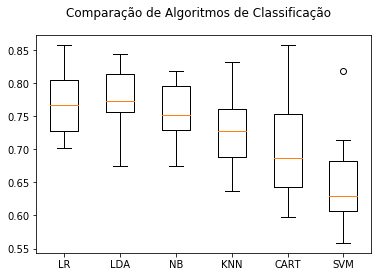

In [50]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos: Vantagem de Python
modelos = [] # Criando lista vazia

# Lista de algoritmos de Machine Learning
modelos.append(('LR', LogisticRegression())) # Ideal para Classificação Binária
modelos.append(('LDA', LinearDiscriminantAnalysis())) # Ideal para Classificação Binária
modelos.append(('NB', GaussianNB())) # Ideal para Classificação Binária
modelos.append(('KNN', KNeighborsClassifier())) 
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = [] # Lista para resultados
nomes = []      # Lista para nomes

for nome, modelo in modelos: # Percorrer a lista de modelos, loop para cada algoritmo
    kfold = KFold(n_splits = num_folds, random_state = seed) # Para cada item da lista, gerar KFold
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy') # Realizar Cross-Validation com Acurácia
    resultados.append(cv_results) # Resultado do Cross_Validation Incluir na lista "resultados"
    nomes.append(nome) # Incluir nome do modelo
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os resultados dos algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()
# Por fim avaliamos e selecionamos o melhor modelo.

Acima, foram treinados e testados seis algoritmos diferentes. 

Os algoritmos LR e LDA foram os que apresentaram melhor performance de acordo com a Acurácia no Eixo Y e algoritmos no Eixo X.

A linha amarela dentro de cada BoxPlot representa exatamente a Acurácia

# Selecionado melhor Modelo e Otimizando.

## Otimização do Modelo - Ajuste de Hyperparâmetros

Todos os algoritmos de Machine Learning são parametrizados, o que significa que podemos AJUSTAR a performance do modelo preditivo, através do TUNING dos parâmetros.

Nosso trabalho é encontrar a MELHOR COMBINAÇÃO ENTRE OS PARÂMETROS EM CADA ALGORITMO de Machine Learning. Esse processo também é chamado de Otimização de Hyperparâmetros. 

O scikit-learn oferece dois métodos para otimização automática dos parâmetros: 

• Grid Search Parameter Tuning 

• Random Search Parameter Tuning. 

### Grid Search - Parameter Tuning

Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid, uma tabela de combinações. 

Aplicando Grid Search utilizando o algoritmo de Regressão Logística. 

In [51]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import GridSearchCV # Importando função Grid
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados no dicionário
# Hiperparâmetros 'penalty' e 'C', valores []
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
# Para este caso, consultar a documentação LOGISTIC REGRESSION SCIKIT LEARN

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



# Criando o modelo
modelo = LogisticRegression()

# Criando o grid Chamando a função de Tuning
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)
# Retornou 'C' = 10 como melhor valor, sendo que Default é 1.0

Acurácia: 77.083
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### Random Search Parameter Tuning

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de iterações|repetições.

Um modelo é construído e testado para cada combinação de parâmetros.

O modelo buscará a comparação dos parâmetros de forma randômica. 

In [52]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV # Função Random
from sklearn.linear_model import LogisticRegression # Importar algoritmo

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
seed = 7
iterations = 14

# Definindo os valores que serão testados no Grid
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid chamando a função Randomized
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 77.083
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# Salvando o resultado em Disco

In [53]:
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle # Pacote permite salvar o modelo em um formato específico


# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo no diretório modelos, no mesmo local do notebook
arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
#pickle.dump baixa e GRAVA no "arquivo", com privilégio de escrit 'wb'
print("Modelo salvo!")

# Carregando o arquivo pickle.load 
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 75.591


# Otimizando Performance com Métodos Ensemble

Métodos Ensemble permitem aumentar consideravelmente o nível de precisão nas suas previsões. Veremos como criar alguns dos Métodos Ensemble mais poderosos em Python. Existem 3 métodos principais para combinar previsões a partir de diferentes modelos:

Bagging - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsetvs no dataset de treino. Ou seja, vários Subsets vão sendo gerados, várias amostras do conjuntos de dados de Treino e à cada Amostra aplicando multiplos modelos de Machine Learning. - Modelo de Árvore de Decisão

Boosting - Para construção de múltiplos modelos (normalmente do mesmo tipo), onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior, dentro da sequência de modelos criados. Essa categoria em geral apresenta EXCELENTE PERFORMANCE, são modelos que vão aprendendo com os erros de sua versão anterior. - Modelo de Árove de Decisão

Voting - Para construção de múltiplos modelos (normalmente de tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões. É um sistema de votação, seleciona diversos algoritmos diferentes e fazer eles trabalharem em paralelo. Ao final é realizada uma votação. 

Permite criar vários modelos de tipos diferentes.

Vejamos como utilizar estes métodos.

### Bagged Decision Trees

Este método funciona bem quando existe alta variância nos dados

In [54]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold # Usar Cross Validation
from sklearn.model_selection import cross_val_score # Usar Cross Validation
from sklearn.ensemble import BaggingClassifier #BaggingClassifier Pacote Ensemble
from sklearn.tree import DecisionTreeClassifier # Pacote Tree

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10 #
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Cria o modelo unitário (classificador fraco)
cart = DecisionTreeClassifier() 
# Criando um modelo de Mahcine Learning de Árvore de Decisão

# Definindo o número de trees para reprodução em conjunto
num_trees = 100

# Criando|Alimentando o modelo baggingClassifier
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)

# Cross Validation para Realizar o treinamento 
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Bagged Decision Tree Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.913


### Random Forest

É uma excelente opção para seleção de variáveis. 

Random Forest é uma extensão do Bagging Decision Tree. 

Amostras do dataset de treino são usadas COM REPOSIÇÃO, mas as árvores são criadas de uma forma que reduz a correlação entre classificadores individuais.

Random Forest é um conjunto de árvores de decisão. Na prática ele é da categoria de Bagging, vários classificadores fracos para trabalharem em conjunto.

In [55]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Random Forst Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.346


### AdaBoost

Algoritmos baseados em Boosting Ensemble criam uma sequência de modelos que tentam corrigir seus erros baseados nos modelos anteriores. Machine Learning aprendendo com Machine Learning 

Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo com sua acurácia e os resultados são combinados para criar uma previsão única final. 

O AdaBoost atribui pesos às instâncias no dataset, definindo quão fácil ou difícil elas são para o processo de classificação, permitindo que o algoritmo tenha mais ou menos atenção às instâncias durante o processo de construção dos modelos.

In [56]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier # Pacote ensemble

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo com AdaBoosClassifie
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("AdaBoost Classifier Acurácia: %.3f" % (resultado.mean() * 100))

# É preciso trabalhar com Pré Processamento

Acurácia: 75.528


### Stochastic Gradient Boosting

Também chamado Gradient Boosting, é um dos métodos Ensemble mais sofisticados. 

In [57]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier # Pacote Ensemble

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo GradientBoostingClassifier
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Gradient Boosting Classifie Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.919


### Voting Ensemble

Este é um dos métodos Ensemble mais simples. Este método cria dois ou mais modelos separados a partir do dataset de treino. O Classificador Voting então utiliza a média das previsões de cada sub-modelo para fazer as previsões em novos conjuntos de dados. As previsões de cada sub-modelo podem receber pesos, através de parâmetros definidos manualmente ou através de heurística. Existem versões mais avançadas do Voting, em que o modelo pode aprender o melhor peso a ser atribuído aos sub-modelos. Isso é chamado Stacked Aggregation, mas ainda não está disponível no Scikit-learn.

In [58]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds para usar validação cruzada
kfold = KFold(num_folds, True, random_state = seed)

# Criando lista vazia de estimadores. Receberá estimadores conforme appends
estimators = [] 

modelo1 = LogisticRegression() #Modelo 1 de Regreressão Logística
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier() #Modelo 2 de Árvores de Decisão
estimators.append(('cart', modelo2))

modelo3 = SVC() # Modelo 3 SVC
estimators.append(('svm', modelo3))

# Criando o modelo ensemble e Passando a LISTA de modelos no VotingClassifier
ensemble = VotingClassifier(estimators) 

# Cross Validation
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

# Resultado
print("Voting Ensemble Acurácia: %.3f" % (resultado.mean() * 100))

#Acurácia ainda menor com 3 modelos sem Pré-Processamento

Acurácia: 74.749


## Algoritmo XGBoost - Extreme Gradient Boosting

O algoritmo XGBoost é uma extensão do GBM (Gradient Boosting Method) que permite trabalhar com multithreading (executar o algoritmo e maneira paralela) em uma única máquina e processamento paralelo em um cluster de vários servidores.

A principal vantagem do XGBoost sobre o GBM é sua capacidade de gerenciar dados esparsos. O XGBoost automaticamente aceita dados esparsos como input sem armazenar zeros na memória.

Principais vantagens do XGBoost:

1- Aceita dados esparsos (o que permite trabalhar com matrizes esparsas), sem a necessidade de conversão para matrizes densas.

2- Constrói uma árvore de aprendizagem utilizando um moderno método de split (chamado quatile sketch), o que resulta em tempo de processamento muito menor que métodos tradicionais.

3- Permite computação paralela em uma única máquina (através do uso de multithreading) e processamento paralelo em máquinas distribuídas em cluster.

Basicamente o XGBoost utiliza os mesmos parâmetros do GBM e permite tratamento avançado de dados missing.

O XGBoost é muito utilizado por Cientistas de Dados que vencem competições no Kaggle. Repositório no Github: https://github.com/dmlc/XGBoost

### Instalar XGBoost a partir do PyPi
!pip install xgboost

In [60]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier # Pacote xgboost

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo FIT
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("XGBoost Acurácia: %.2f%%" % (accuracy * 100.0))

# Todos os parâmetros usados apra o modelo. 
# Necessário pré-processamento e seleção de variáveis para melhor acurácia


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Acurácia: 77.95%
